<a href="https://colab.research.google.com/github/693080593/research/blob/master/%E5%BE%AA%E7%8E%AF%E5%8F%91%E7%94%B5%E5%8E%82%E7%94%B5%E8%83%BD%E8%BE%93%E5%87%BA%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1.安装xlrd
pip install xlrd

SyntaxError: ignored

In [2]:
# 2.读取数据
import pandas as pd
import numpy as np
# 第二参数代表要读取的sheet, 0表示第一个, 1表示第二个..., pandas默认读取第一个
df = pd.read_excel(r'/content/Folds5x2_pp.xlsx',4)

In [3]:
# 3.查看数据前3行/后3行
pd.set_option('display.max_rows',6)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
...,...,...,...,...,...
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


In [4]:
# 4.查看数据整体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
# 5.描述性统计
pd.set_option('display.max_rows', None)
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
# 6.偏态系数
for i in df.columns:
  print('{}偏态系数：'.format(i),df[i].skew())

AT偏态系数： -0.1363930494749227
V偏态系数： 0.19852101136676173
AP偏态系数： 0.2654446935825862
RH偏态系数： -0.4318387491833329
PE偏态系数： 0.3065094354204023


In [7]:
# 7.峰态系数
for i in df.columns:
  print('{}峰态系数为：'.format(i),df[i].kurt())

AT峰态系数为： -1.0375491923092457
V峰态系数为： -1.4443366772319615
AP峰态系数为： 0.0942371953033132
RH峰态系数为： -0.4445263744874084
PE峰态系数为： -1.0485209686925079


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


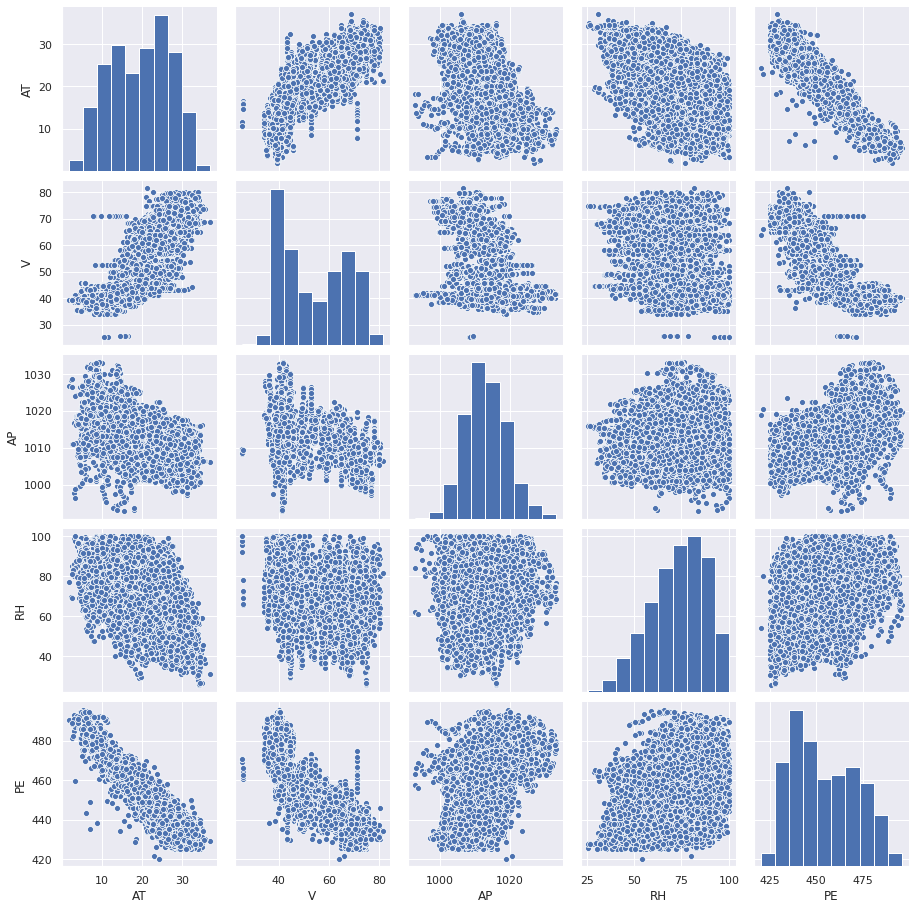

In [8]:
# 1.散点图
import seaborn as sns
import matplotlib.pyplot as plt
# 初始化
sns.set()
# 绘制分布矩阵
sns.pairplot(df)
# 保存图片
plt.savefig('ccpp.png')
plt.show()

In [9]:
# 2.相关系数
# 计算相关系数, 默认为皮尔逊相关系数
correlation = df.corr()
correlation

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


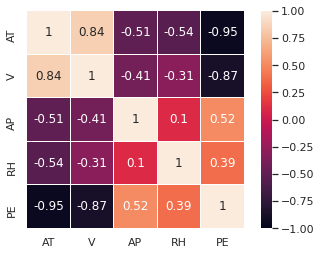

In [10]:
# 绘制热力图, 设置线宽, 最大值, 最小值, 线条白色, 显示数值, 方形
sns.heatmap(correlation,linewidth=0.2,vmax=1,vmin=-1,linecolor='w',annot=True,square=True)
# 保存图片
plt.savefig('correlation.png')
plt.show()

In [11]:
# 1.划分数据集
from sklearn.model_selection import train_test_split
X,y=df[['AT','V','AP','RH']], df['PE']
# 按照8:2的比例划分为训练数据集和测试数据集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
# 2.构建模型
from sklearn.linear_model import LinearRegression
# 模型实例化
LR=LinearRegression()
# 训练模型
LR.fit(X_train,y_train)
print("截距：",LR.intercept_)
print("回归系数：",LR.coef_)

截距： 449.7324806988672
回归系数： [-1.96773639 -0.23885884  0.06688088 -0.15702754]


In [13]:
# 3.模型评估
# 1)平均绝对误差MAE(mean_absolute_error)
from sklearn import metrics
# 分别对训练集和测试集进行预测
y_train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)
# 分别计算训练集和测试集的平均绝对误差
y_train_mae=metrics.mean_absolute_error(y_train,y_train_pred)
y_test_mae=metrics.mean_absolute_error(y_test,y_test_pred)
print('训练集MAE:',y_train_mae)
print('测试集MAE:',y_test_mae)

训练集MAE: 3.6371591856922616
测试集MAE: 3.579600421211637


In [14]:
# 2)均方误差MSE(mean_square_error)
# 分别计算训练集和测试集的均方误差
y_train_mse=metrics.mean_squared_error(y_train,y_train_pred)
y_test_mse=metrics.mean_squared_error(y_test,y_test_pred)
print('训练集MSE:',y_train_mse)
print('测试集MSE:',y_test_mse)

训练集MSE: 21.175512414885667
测试集MSE: 19.143808935660473


In [15]:
# 3)均方根误差RMSE(root_mean_square_error)
from math import sqrt
y_train_rmse=sqrt(y_train_mse)
y_test_rmse=sqrt(y_test_mse)
print('训练集RMSE:',y_train_rmse)
print('测试集RMSE:',y_test_rmse)

训练集RMSE: 4.601685823139784
测试集RMSE: 4.375363863230174


In [16]:
# 4) 多重判定系数R2(r2_score)
y_train_r2=metrics.r2_score(y_train,y_train_pred)
y_test_r2=metrics.r2_score(y_test,y_test_pred)
print('训练集R2:',y_train_r2)
print('测试集R2:',y_test_r2)

训练集R2: 0.927188324551793
测试集R2: 0.9345681403132959


In [17]:
# 直接用训练好的模型去评分
y_train_score=LR.score(X_train,y_train)
y_test_score=LR.score(X_test,y_test)
print('训练集score:',y_train_score)
print('预测集score:',y_test_score)

训练集score: 0.927188324551793
预测集score: 0.9345681403132959


In [18]:
# 1)线性关系检验
from pandas import Series
from scipy.stats import f
# 将array转为series格式
y_train_pred=Series(y_train_pred,index=y_train.index)
# 分别计算训练数据上的SSR和SSE
y_train_ssr=y_train_pred.apply(lambda x:(x-y_train.mean())**2).sum()
y_train_sse=y_train.sub(y_train_pred).apply(lambda x:x**2).sum()
# dn是SSR的自由度(自变量个数), df则是SSE的自由度
dn = 4
df = y_train.shape[0]-dn-1
# 计算F值
y_train_f=(y_train_ssr/dn)/(y_train_sse/df)
# 计算p值
p=f.sf(y_train_f,dn,df)
# 计算0.05显著性水平下临界值
cr_value=f.isf(0.05,dn,df)
print('训练数据集F值:',y_train_f)
print('0.05显著性水平下临界值:',cr_value)
print('训练数据集P值:%.20f'%p)

训练数据集F值: 24350.708354257873
0.05显著性水平下临界值: 2.3730935370191646
训练数据集P值:0.00000000000000000000


In [20]:
from scipy.stats import t
def get_tvalue(sse, df, matr, beta, i):
    '''计算t值'''
    mse = sse / df
    sbeta = sqrt(matr[i+1, i+1]* mse)
    t = beta / sbeta
    return t

limit = t.isf(0.025, df)
print('0.05显著性水平下的临界值: ', limit)

X_train['B'] = 1
X_train = X_train.reindex(columns=['B', 'AT', 'V', 'AP', 'RH'])
#转成矩阵
xm = np.mat(X_train)
#计算(X'X)的逆矩阵
xmi = np.dot(xm.T, xm).I
index, betas = range(4), LR.coef_
for i, beta in zip(index, betas):
    tvalue = get_tvalue(y_train_sse, df, xmi, beta, i)
    pvalue = t.sf(abs(tvalue), df)*2
    print('beta{0}的t值: '.format(i+1), tvalue)
    print('beta{0}的p值: '.format(i+1), pvalue)

0.05显著性水平下的临界值:  1.960274174143439
beta1的t值:  -114.05857061541506
beta1的p值:  0.0
beta2的t值:  -29.157649651962732
beta2的p值:  2.543177597157901e-177
beta3的t值:  6.264989627221425
beta3的p值:  3.93031294823419e-10
beta4的t值:  -33.35883434790094
beta4的p值:  6.359041326321838e-228


In [21]:
# 读取数据
import pandas as pd
# 第二参数代表要读取的sheet, 0表示第一个, 1表示第二个..., pandas默认读取第一个
df = pd.read_excel(r'/content/Folds5x2_pp.xlsx',4)

In [66]:
# 1.删除共线变量
# 划分数据集
X1,y1=df[['AT','AP','RH']],df['PE']
# 按照8:2的比例划分为训练数据集和测试数据集
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)
# 训练模型, 预测以及计算均方根误差和多重判定系数
LR1 = LinearRegression()
LR1.fit (X1_train, y1_train)
inter, co = LR1.intercept_, LR1.coef_
y1_train_pred = LR1.predict(X1_train)
y1_train_rmse = sqrt(metrics.mean_squared_error(y1_train, y1_train_pred))
y1_train_score = LR1.score (X1_train, y1_train)

print("回归模型：PE={0}+{1}AT+{2}AP+{3}RH".format(inter,co[0],co[1],co[2]))
print('训练集RMSE:',y1_train_rmse)
print('训练集拟合优度:',y1_train_score)

#计算F检验中0.05显著性水平下的P值
y1_train_pred = Series(y1_train_pred, index=y1_train.index)
y1_train_ssr = y1_train_pred.apply(lambda x: (x - y1_train.mean())**2).sum()
y1_train_sse = y1_train.sub(y1_train_pred).apply(lambda x: x**2).sum()
dn1, df1 = 3, y1_train.shape[0]-3-1
y1_train_f = (y1_train_ssr/dn1) / (y1_train_sse/df1)
y1_p = f.sf(y1_train_f, dn1, df1)
# cr_value = f.isf(0.05, dn, df)
print('F检验 0.05显著性水平下训练数据的P值: %.20f'% y1_p)

#计算t检验在0.05显著性水平下的P值
def get_t1value(sse, df, matr, beta, i):
    mse = sse / df
    sbeta = sqrt(matr[i+1, i+1]* mse)
    t = beta / sbeta
    return t
X1_train['B'] = 1
X1_train = X1_train.reindex(columns=['B', 'AT', 'AP', 'RH'])
xm1 = np.mat(X1_train)
xmi1 = np.dot(xm1.T, xm1).I
index, betas = range(3), LR1.coef_
for i, beta in zip(index, betas):
    tvalue = get_t1value(y1_train_sse, df1, xmi1, beta, i)
    pvalue = t.sf(abs(tvalue), df1)*2
    print('t检验 0.05显著性水平下beta{0}的p值: '.format(i+1), pvalue)

回归模型：PE=492.4515979243632+-2.3801557396204336AT+0.02352419652745133AP+-0.20691413049549987RH
训练集RMSE: 4.825629760697673
训练集拟合优度: 0.9198244628262398
F检验 0.05显著性水平下训练数据的P值: 0.00000000000000000000
t检验 0.05显著性水平下beta1的p值:  0.0
t检验 0.05显著性水平下beta2的p值:  0.033644019026809295
t检验 0.05显著性水平下beta3的p值:  0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
# 2.转换模型形式
# 读取数据
import pandas as pd
# 第二参数代表要读取的sheet, 0表示第一个, 1表示第二个..., pandas默认读取第一个
df = pd.read_excel(r'/content/Folds5x2_pp.xlsx',4)

# 将数据进行对数转换
df_log = np.log(df)

In [59]:
# 划分数据集
X2,y2=df_log[['AT','V','AP','RH']],df_log['PE']
# 按照8:2的比例划分为训练数据集和测试数据集
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)
# 训练模型, 预测以及计算均方根误差和多重判定系数
LR2 = LinearRegression()
LR2.fit (X2_train, y2_train)
inter, co = LR2.intercept_, LR2.coef_
y2_train_pred = LR2.predict(X2_train)
y2_train_rmse = sqrt(metrics.mean_squared_error(y2_train, y2_train_pred))
y2_train_score = LR2.score (X2_train, y2_train)

print("回归模型：PE={0}+{1}AT+{2}V+{3}AP+{4}RH".format(inter,co[0],co[1],co[2],co[3]))
print('训练集RMSE:',y2_train_rmse)
print('训练集拟合优度:',y2_train_score)

#计算F检验中0.05显著性水平下的P值
y2_train_pred = Series(y2_train_pred, index=y2_train.index)
y2_train_ssr = y2_train_pred.apply(lambda x: (x - y2_train.mean())**2).sum()
y2_train_sse = y2_train.sub(y2_train_pred).apply(lambda x: x**2).sum()
dn2, df2 = 4, y2_train.shape[0]-4-1
y2_train_f = (y2_train_ssr/dn2) / (y2_train_sse/df2)
y2_p = f.sf(y2_train_f, dn2, df2)

print('F检验 0.05显著性水平下训练数据的P值: %.20f'% y2_p)

#计算t检验在0.05显著性水平下的P值
def get_t2value(sse, df, matr, beta, i):
    mse = sse / df
    sbeta = sqrt(matr[i+1, i+1]* mse)
    t = beta / sbeta
    return t
X2_train['B'] = 1
X2_train = X2_train.reindex(columns=['B', 'AT', 'V', 'AP', 'RH'])
xm2 = np.mat(X2_train)
xmi2 = np.dot(xm2.T, xm2).I
index, betas = range(4), LR2.coef_
for i, beta in zip(index, betas):
    tvalue = get_t2value(y2_train_sse, df2, xmi2, beta, i)
    pvalue = t.sf(abs(tvalue), df2)*2
    print('t检验 0.05显著性水平下beta{0}的p值: '.format(i+1), pvalue)

回归模型：PE=2.816773875270946+-0.05103695636136266AT+-0.0562924170545937V+0.5339550156127436AP+-0.005459587145139243RH
训练集RMSE: 0.01044981670518422
训练集拟合优度: 0.9223192189978403
F检验 0.05显著性水平下训练数据的P值: 0.00000000000000000000
t检验 0.05显著性水平下beta1的p值:  0.0
t检验 0.05显著性水平下beta2的p值:  0.0
t检验 0.05显著性水平下beta3的p值:  2.3401361066651722e-110
t检验 0.05显著性水平下beta4的p值:  1.2354418326113434e-17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


测试集RMSE: 0.010373290798108704
测试集拟合优度: 0.92114668069201


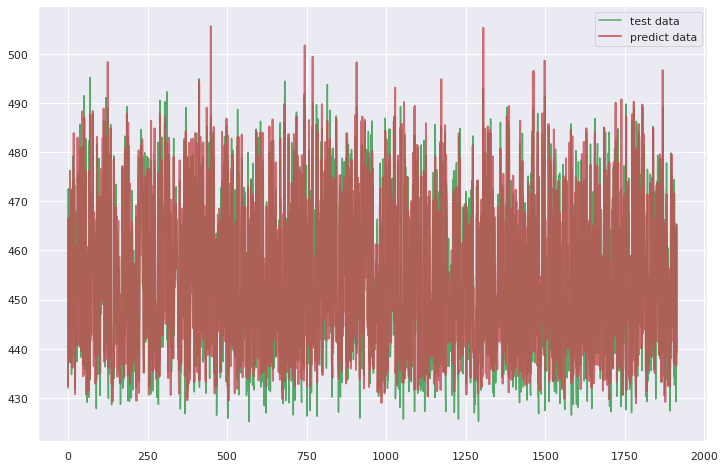

In [70]:
# 6.模型应用
import matplotlib.pyplot as plt

# 用训练好的模型去预测
y2_test_pred = LR2.predict(X2_test)
y2_test_rmse = sqrt(metrics.mean_squared_error(y2_test,y2_test_pred))
y2_test_score = LR2.score(X2_test,y2_test)
print('测试集RMSE:', y2_test_rmse)
print('测试集拟合优度:',y2_test_score)

# 绘制曲线

y2_test=np.exp(y2_test)
y2_test_pred=np.exp(y2_test_pred)

plt.figure(figsize=(12,8))
plt.plot(range(len(y2_test)),y2_test,'g',label='test data')
plt.plot(range(len(y2_test_pred)),y2_test_pred,'r',label='predict data',linewidth=2,alpha=0.8)
plt.legend()
plt.savefig('tp.png')
plt.show()